## <h1><center>Machine Learning Project</center></h1>

### <center> Class of 2019/2020 </center> 



   <center> Maren
    <br>
    Catarina Palha - M20190156
    <br>
    Mafalda 
    <br>
    Pedro </center>


In [1]:
#FILL WITH YOUR NAME AND NUMBER PLZ, THE LAST ONE DELETES THIS CELL

## 1. Introduction

On January 1st, 2020, an epidemy was originated in Albuquerque, in New Mexico state, and spread on the
following days to Santa Fe and Taos. It is estimated that the epidemy has already affected more than 1000
people at the end of February, with a mortality rate of more than 50%.

__GOAL__: What are the people more likely to survive to the boolean pandemic?


## 2. About the data

`Patient_ID` The unique identifier of the patient<br>
`Family_Case_ID` The family identification<br>
`Severity`The severity of the disease, where 1 is the lowest and 3 the highest severity<br>
`Name`The name of the patient<br>
`Birthday_year`The year of birthday of the patient<br>
`Parents_Siblings_Infected` The number of parents and/or siblings infected<br>
`Partner_Children_Infected`The number of partner and/or children infected<br>
`Medical_Expenses_Family`The medical expenses associated to try to contain the epidemy on the family<br>
`Medical_Tent` The medical tent where the patient is / was lodged<br>
`City` The original city of the patient<br>
`Deceased` Flag if the patient deceased or not with the virus (0 = No, 1 = Yes)<br>


### TODO (INDEX)

* [1. Datasets to analyse](#firstAnalyse)
    * [1.1. Replace all the nulls](#tech1)
    * [1.2. Replace birthday_year column and drop the tents one](#tech2)
* [2. Rank features](#selection)

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### 1. Cleaning data

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
0,1,4696,3,Miss Linda Betty,NaN,0,0,225,NaN,Santa Fe,1
1,2,21436,1,Ms. Ramona Elvira,1966.0,0,1,1663,NaN,Albuquerque,0
2,3,7273,3,Mr. Mario Vernon,1982.0,0,0,221,NaN,Santa Fe,1
3,4,8226,3,Mr. Hector Joe,1997.0,0,0,220,NaN,Santa Fe,1
4,5,19689,3,Ms. Jennie Debra,1994.0,0,0,222,NaN,Santa Fe,0


In [4]:
df.shape

(900, 11)

In [5]:
df.describe()

,Patient_ID,Family_Case_ID,Severity,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Deceased
count,900.000000,900.000000,900.000000,723.000000,900.000000,900.000000,900.000000,900.000000
mean,450.500000,14305.827778,2.313333,1990.266943,0.380000,0.521111,895.743333,0.614444
std,259.951919,25418.153900,0.834223,14.523335,0.803247,1.098385,1385.829926,0.486997
min,1.000000,345.000000,1.000000,1940.000000,0.000000,0.000000,0.000000,0.000000
25%,225.750000,8203.000000,2.000000,1982.000000,0.000000,0.000000,221.000000,0.000000
50%,450.500000,13593.500000,3.000000,1992.000000,0.000000,0.000000,405.000000,1.000000
75%,675.250000,18906.500000,3.000000,1999.500000,0.000000,1.000000,861.250000,1.000000
max,900.000000,742836.000000,3.000000,2019.000000,6.000000,8.000000,14345.000000,1.000000


In [6]:
def unique(df):
    """To check the unique values of each columns"""
    cols = df.columns
    for name in cols:
        print('Unique values for column' , name , 'are: ' , df[name].unique())
        
#It doesn't seem to exist anything strange
#unique(df)

In [7]:
df.info()
#We've NaN values in Birthday_year, Medical_Tent and City
#Let's check this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
Patient_ID                           900 non-null int64
Family_Case_ID                       900 non-null int64
Severity                             900 non-null int64
Name                                 900 non-null object
Birthday_year                        723 non-null float64
Parents or siblings infected         900 non-null int64
Wife/Husband or children infected    900 non-null int64
Medical_Expenses_Family              900 non-null int64
Medical_Tent                         198 non-null object
City                                 898 non-null object
Deceased                             900 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 77.5+ KB


In [8]:
df.isnull().sum()

Patient_ID                             0
Family_Case_ID                         0
Severity                               0
Name                                   0
Birthday_year                        177
Parents or siblings infected           0
Wife/Husband or children infected      0
Medical_Expenses_Family                0
Medical_Tent                         702
City                                   2
Deceased                               0
dtype: int64

In [9]:
import seaborn as sns

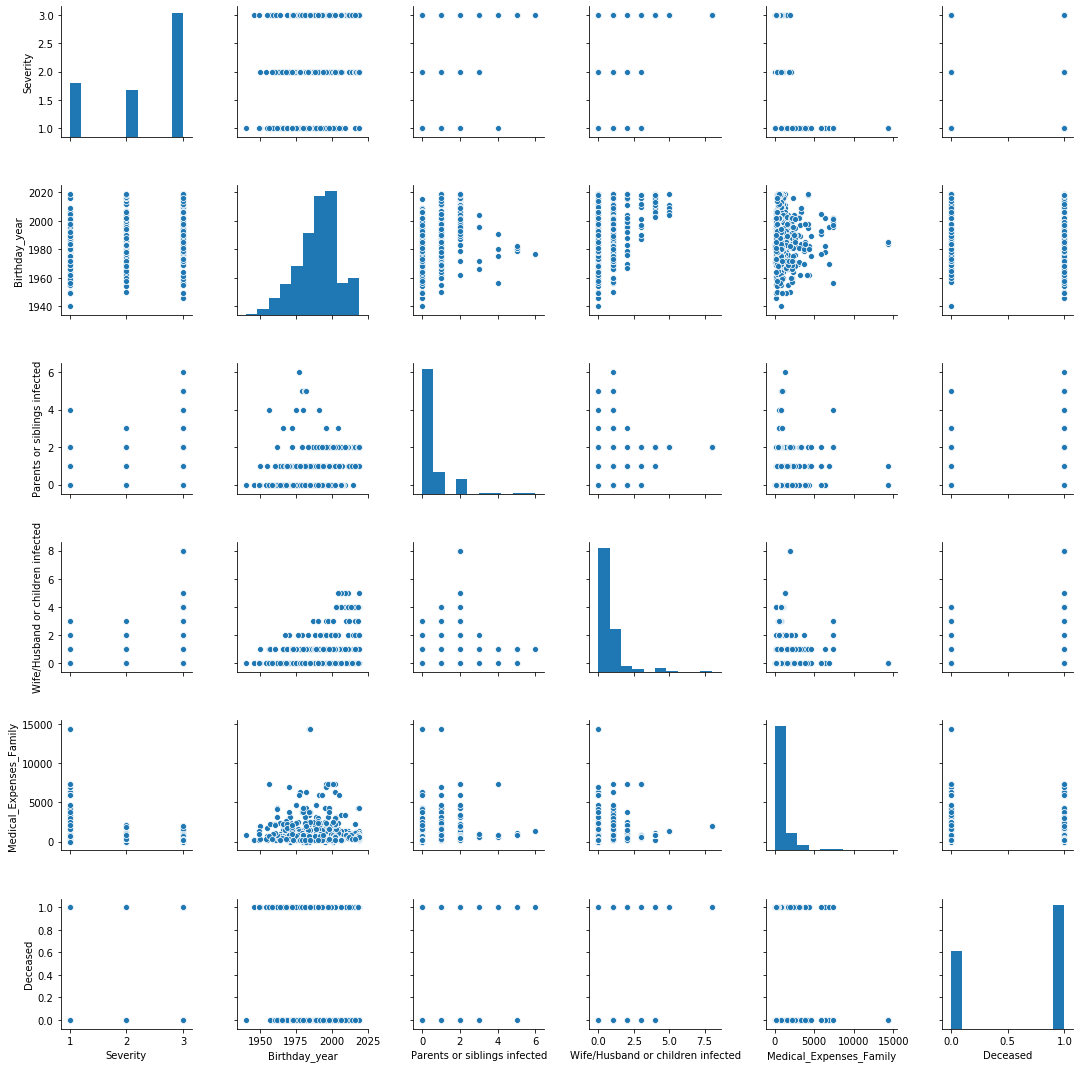

In [10]:
sns.pairplot(df[['Severity', 'Birthday_year', 'Parents or siblings infected', 'Wife/Husband or children infected', 'Medical_Expenses_Family',
                'Medical_Tent', 'City', 'Deceased']])

In [12]:
#Let's analyse birthday_year VS severity
#I'm using the median because we have outliers.

df_grouped = df.groupby(['City','Medical_Tent', 'Deceased'])['Severity'].agg({'Median': 'median', 'Count': 'count'}).round(0).reset_index()
df_grouped

,City,Medical_Tent,Deceased,Median,Count
0,Albuquerque,A,0,1.0,4
1,Albuquerque,A,1,1.0,3
2,Albuquerque,B,0,1.0,17
3,Albuquerque,B,1,1.0,5
4,Albuquerque,C,0,1.0,14
5,Albuquerque,C,1,1.0,7
6,Albuquerque,D,0,1.0,11
7,Albuquerque,D,1,2.0,2
8,Albuquerque,E,0,1.0,5
9,Albuquerque,F,0,3.0,1


In [13]:
df_city_nan = df[df['City'].isnull()]
df_city_nan
#On 49: severity = 1 and medical_tent = B --> it can be albuquerque or santa fe.
#How to know? On tent B they are not infected --> choose the one with more people, it is Albuquerque
#Note that the 2 missing values are from the same family (family_id = 23155), it's normal from them to be in the same city

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
49,50,23155,1,Ms. Elizabeth Teri,1958.0,0,0,2240,B,NaN,0
530,531,23155,1,Ms. Tricia Kathryn,1982.0,0,0,2240,B,NaN,0


In [14]:
df['City'] = df['City'].fillna("Albuquerque")

In [15]:
df_tent_nan = df[df['Medical_Tent'].isnull()]
df_tent_nan.groupby(['City', 'Severity', 'Deceased'])['Patient_ID'].count().reset_index()
#Let's try to group this by city, severity and deceased
#These are the combinations that we need to replace

,City,Severity,Deceased,Patient_ID
0,Albuquerque,1,0,10
1,Albuquerque,1,1,10
2,Albuquerque,2,0,8
3,Albuquerque,2,1,7
4,Albuquerque,3,0,24
5,Albuquerque,3,1,41
6,Santa Fe,1,0,15
7,Santa Fe,1,1,12
8,Santa Fe,2,0,66
9,Santa Fe,2,1,86


In [16]:
df_tent_grouped = df.groupby(['City', 'Severity', 'Deceased', 'Medical_Tent'])['Patient_ID'].count().reset_index()
df_tent_grouped
#Here we can replace the NaN values with the tents that have less people, according with the (City, Severity, Deceased) combination
#Legend: Albuquerque - 1, Santa Fe - 2 and Taos - 3

,City,Severity,Deceased,Medical_Tent,Patient_ID
0,Albuquerque,1,0,A,4
1,Albuquerque,1,0,B,19
2,Albuquerque,1,0,C,13
3,Albuquerque,1,0,D,10
4,Albuquerque,1,0,E,5
5,Albuquerque,1,1,A,3
6,Albuquerque,1,1,B,5
7,Albuquerque,1,1,C,7
8,Albuquerque,1,1,D,1
9,Albuquerque,2,0,D,1


In [17]:
df_nan = df[df['Medical_Tent'].isna()]
df_nan['Medical_Tent'] = df_nan['Medical_Tent'].fillna(0)
df_nan.shape #correct

(702, 11)

In [18]:
df_grouped_nan = df_nan.groupby(['City', 'Severity', 'Deceased'])['Medical_Tent'].count()
df_grouped_nan

City         Severity  Deceased
Albuquerque  1         0            10
                       1            10
             2         0             8
                       1             7
             3         0            24
                       1            41
Santa Fe     1         0            15
                       1            12
             2         0            66
                       1            86
             3         0            65
                       1           282
Taos         2         0             1
                       1             2
             3         0            27
                       1            46
Name: Medical_Tent, dtype: int64

In [19]:
df.isnull().sum()

Patient_ID                             0
Family_Case_ID                         0
Severity                               0
Name                                   0
Birthday_year                        177
Parents or siblings infected           0
Wife/Husband or children infected      0
Medical_Expenses_Family                0
Medical_Tent                         702
City                                   0
Deceased                               0
dtype: int64

In [20]:
#The (Albuquerque, 1, 0) combination, if there are NaN they will be replaced with A because is the tent with less people.
df_1_1_0 = df_nan[(df['City'] == 'Albuquerque') & (df_nan['Severity'] == 1) & (df_nan['Deceased'] == 0)].fillna('A')
df_1_1_0['Medical_Tent'] = df_1_1_0['Medical_Tent'].fillna('A')

df_1_1_0.shape

(10, 11)

In [21]:
#The (Santa Fe, 1, 0) combination, if there are NaN they will be replaced with A because is the tent with less people.
df_2_1_0 = df_nan[(df_nan['City'] == 'Santa Fe') & (df_nan['Severity'] == 1) & (df_nan['Deceased'] == 0)]
df_2_1_0['Medical_Tent'] = df_2_1_0['Medical_Tent'].fillna('A')

df_2_1_0.shape

(15, 11)

In [22]:
#The (Taos, 2, 0) combination, if there are NaN they will be replaced with E because is the tent with less people.
df_3_2_0 = df_nan[(df_nan['City'] == 'Taos') & (df_nan['Severity'] == 2) & (df_nan['Deceased'] == 0)]
df_3_2_0['Medical_Tent'] = df_3_2_0['Medical_Tent'].fillna('E')

df_3_2_0.shape

(1, 11)

In [23]:
#The (Albuquerque, 1, 1) combination, if there are NaN they will be replaced with D because is the tent with less people.
df_1_1_1 = df_nan[(df_nan['City'] == 'Albuquerque') & (df_nan['Severity'] == 1) & (df_nan['Deceased'] == 1)]
df_1_1_1['Medical_Tent'] = df_1_1_1['Medical_Tent'].fillna('D')

df_1_1_1.shape

(10, 11)

In [24]:
#The (Santa Fe, 1, 1) combination, if there are NaN they will be replaced with T because is the tent with less people.
df_2_1_1 = df_nan[(df_nan['City'] == 'Santa Fe')  & (df_nan['Severity'] == 1) & (df_nan['Deceased'] == 1)]
df_2_1_1['Medical_Tent'] = df_2_1_1['Medical_Tent'].fillna('T')

df_2_1_1.shape

(12, 11)

In [25]:
#The (Taos, 2, 1) combination, if there are NaN they will be replaced with C because is the tent with less people.
#We don't have this combination on our dataframe probably because they are all NaN values
#We can't put infected among not infected so either C or F, let's choose F
df_3_2_1 = df_nan[(df_nan['City'] == 'Taos') & (df_nan['Severity'] == 2) & (df_nan['Deceased'] == 1)]
df_3_2_1['Medical_Tent'] = df_3_2_1['Medical_Tent'].fillna('F')

df_3_2_1.shape

(2, 11)

In [26]:
#The (Albuquerque, 2, 0) combination, if there are NaN they will be replaced with D because is the tent with less people.
df_1_2_0 = df_nan[(df_nan['City'] == 'Albuquerque') & (df_nan['Severity'] == 2) & (df_nan['Deceased'] == 0)]
df_1_2_0['Medical_Tent'] = df_1_2_0['Medical_Tent'].fillna('D')

df_1_2_0.shape

(8, 11)

In [27]:
#The (Santa Fe, 2, 0) combination, if there are NaN they will be replaced with D because is the tent with less people.
df_2_2_0 = df_nan[(df_nan['City'] == 'Santa Fe')  & (df_nan['Severity'] == 2) & (df_nan['Deceased'] == 0)]
df_2_2_0['Medical_Tent'] = df_2_2_0['Medical_Tent'].fillna('D')

df_2_2_0.shape

(66, 11)

In [28]:
#The (Taos, 3, 0) combination, if there are NaN they will be replaced with D because is the tent with less people.
#We don't have this combination, but we cannot put infected among with not infected --> let's choose E
df_3_3_0 = df_nan[(df_nan['City'] == 'Taos')  & (df_nan['Severity'] == 3) & (df_nan['Deceased'] == 0)]
df_3_3_0['Medical_Tent'] = df_3_3_0['Medical_Tent'].fillna('E')

df_3_3_0.shape

(27, 11)

In [29]:
#The (Taos, 3, 1) combination, if there are NaN they will be replaced with F because is the tent with less people.
df_3_3_1 = df_nan[(df_nan['City'] == 'Taos')  & (df['Severity'] == 3) & (df_nan['Deceased'] == 1)]
df_3_3_1['Medical_Tent'] = df_3_3_1['Medical_Tent'].fillna('F')

df_3_3_1.shape

(46, 11)

In [30]:
#The (Albuquerque, 2, 1) combination, if there are NaN they will be replaced with D because is the tent with less people.
df_1_2_1 = df_nan[(df_nan['City'] == 'Albuquerque') & (df_nan['Severity'] == 2) & (df_nan['Deceased'] == 1)]
df_1_2_1['Medical_Tent'] = df_1_2_1['Medical_Tent'].fillna('D')

df_1_2_1.shape

(7, 11)

In [31]:
#The (Albuquerque, 3, 0) combination, if there are NaN they will be replaced with C because is the tent with less people.
df_1_3_0 = df_nan[(df_nan['City'] == 'Albuquerque') & (df_nan['Severity'] == 3) & (df_nan['Deceased'] == 0)]
df_1_3_0['Medical_Tent'] = df_1_3_0['Medical_Tent'].fillna('C')

df_1_3_0.shape

(24, 11)

In [32]:
#The (Albuquerque, 3, 1) combination, if there are NaN they will be replaced with D because is the tent with less people.
#We don't have this combination but we choose tent D, because we already have infected people there
df_1_3_1 = df_nan[(df_nan['City'] == 'Albuquerque') & (df_nan['Severity'] == 3) & (df_nan['Deceased'] == 1)]
df_1_3_1['Medical_Tent'] = df_1_3_1['Medical_Tent'].fillna('D')

df_1_3_1.shape

(41, 11)

In [33]:
#The (Santa Fe, 2, 1) combination, if there are NaN they will be replaced with E because is the tent with less people.
df_2_2_1 = df_nan[(df_nan['City'] == 'Santa Fe') & (df_nan['Severity'] == 2) & (df_nan['Deceased'] == 1)]
df_2_2_1['Medical_Tent'] = df_2_2_1['Medical_Tent'].fillna('E')

df_2_2_1.shape

(86, 11)

In [34]:
#The (Santa Fe, 3, 0) combination, if there are NaN they will be replaced with G because is the tent with less people.
df_2_3_0 = df_nan[(df_nan['City'] == 'Santa Fe') & (df_nan['Severity'] == 3) & (df_nan['Deceased'] == 0)]
df_2_3_0['Medical_Tent'] = df_2_3_0['Medical_Tent'].fillna('G')

df_2_3_0.shape

(65, 11)

In [35]:
#The (Santa Fe, 3, 1) combination, if there are NaN they will be replaced with G because is the tent with less people and we already chose G.
df_2_3_1 = df_nan[(df_nan['City'] == 'Santa Fe') & (df_nan['Severity'] == 3) & (df_nan['Deceased'] == 1)]
df_2_3_1['Medical_Tent'] = df_2_3_1['Medical_Tent'].fillna('F')

df_2_3_1.shape

(282, 11)

Replacing the NaN values itself

Let's drop the NaN values in the original df and then concat the previous new ones with the correct values.

Watch out the Birthday_year, where this columns is NaN but not the others, we have 19 rows in this conditions.

In [36]:
df_no_nan_tent = df.dropna(subset = ['Medical_Tent'])

In [37]:
df_no_nan_tent.shape #Correct

(198, 11)

In [38]:
df_no_nan_tent.isnull().sum()

Patient_ID                            0
Family_Case_ID                        0
Severity                              0
Name                                  0
Birthday_year                        19
Parents or siblings infected          0
Wife/Husband or children infected     0
Medical_Expenses_Family               0
Medical_Tent                          0
City                                  0
Deceased                              0
dtype: int64

In [39]:
frames = [df_no_nan_tent, df_1_1_0, df_1_1_1, df_1_2_0, df_1_2_1, df_1_3_0, df_1_3_1,
          df_2_1_0, df_2_1_1, df_2_2_0, df_2_2_1, df_2_3_0, df_2_3_1,
          df_3_2_0, df_3_2_1, df_3_3_0, df_3_3_1]

In [40]:
df_new = pd.concat(frames)

In [41]:
df_new.shape #CORRECT, BAAAAM

(900, 11)

In [42]:
df_new.isnull().sum() #incorrect, we lost  3 rows

Patient_ID                             0
Family_Case_ID                         0
Severity                               0
Name                                   0
Birthday_year                        174
Parents or siblings infected           0
Wife/Husband or children infected      0
Medical_Expenses_Family                0
Medical_Tent                           0
City                                   0
Deceased                               0
dtype: int64

In [43]:
#No duplicates
df_new = df_new.drop_duplicates()

In [44]:
df_new.shape # CORRECT BAAAM

(900, 11)

In [45]:
#Reset the index
df_new = df_new.reset_index(drop = True)

We need now to find a way to replace the remainig 174 NaN values on birthday_year column

In [46]:
df_nan_birth = df_new[df_new['Birthday_year'].isna()]
df_nan_birth

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
0,10,14392,3,Miss Elena Cathy,NaN,1,1,626,F,Albuquerque,0
3,28,22832,3,Master Jeremiah Billy,NaN,0,0,217,F,Taos,1
9,62,14914,1,Master Larry Jan,NaN,0,0,854,C,Santa Fe,0
18,112,20825,1,Miss Amber Nichole,NaN,0,1,4103,B,Albuquerque,0
50,250,22263,1,Master Doyle Rodolfo,NaN,0,0,840,D,Santa Fe,0
...,...,...,...,...,...,...,...,...,...,...,...
887,653,3960,3,Master Micheal Enrique,NaN,0,0,434,0,Taos,1
891,756,18726,3,Miss Penny Rosemarie,NaN,2,0,217,0,Taos,1
893,782,17755,3,Master Jonathon Tyrone,NaN,0,0,192,0,Taos,1
894,825,11306,3,Master Franklin Lionel,NaN,0,0,217,0,Taos,1


In [47]:
df_new_birth = df_new.groupby(['Birthday_year', 'Deceased'])['Patient_ID'].count().reset_index()
df_new_birth

,Birthday_year,Deceased,Patient_ID
0,1940,0,1
1,1946,1,1
2,1949,1,3
3,1950,1,2
4,1954,1,1
...,...,...,...
119,2018,0,3
120,2018,1,7
121,2019,0,12
122,2019,1,2


Drop Name columns it's not usefull

In [48]:
df_new = df_new.drop(['Name'], axis = 1)

In [49]:
df_new.head()

,Patient_ID,Family_Case_ID,Severity,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
0,10,14392,3,NaN,1,1,626,F,Albuquerque,0
1,17,8608,1,1984,1,0,14345,B,Albuquerque,0
2,18,2414,1,1964,0,0,859,A,Albuquerque,1
3,28,22832,3,NaN,0,0,217,F,Taos,1
4,36,10244,1,1984,2,1,3360,B,Santa Fe,0


In [50]:
df_new.isnull().sum()

Patient_ID                             0
Family_Case_ID                         0
Severity                               0
Birthday_year                        174
Parents or siblings infected           0
Wife/Husband or children infected      0
Medical_Expenses_Family                0
Medical_Tent                           0
City                                   0
Deceased                               0
dtype: int64

In [51]:
#Drop the rows with missing values, otherwise KNN doesn't work
df_new = df_new.dropna(axis = 0, how = 'any')

In [52]:
df_new.isnull().sum()

Patient_ID                           0
Family_Case_ID                       0
Severity                             0
Birthday_year                        0
Parents or siblings infected         0
Wife/Husband or children infected    0
Medical_Expenses_Family              0
Medical_Tent                         0
City                                 0
Deceased                             0
dtype: int64

### Birthday column - replacement

It was decided to use KNN to replace the null values in Birthday_year column.

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [89]:
features = df_new[['Severity', 'Medical_Expenses_Family', 'Parents or siblings infected',
                  'Wife/Husband or children infected', 'Deceased']]
    
target =  df_new[['Birthday_year']]

In [90]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(features)

In [95]:
def KNN(n_neighbors, features, target):
    """Given the neighbors number and the features and the target implements
       the KNN algorithm"""
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                        random_state = 10, shuffle = True)

    knn = KNeighborsClassifier(n_neighbors = n_neighbors, metric = 'euclidean')
    
    print(knn)
    
    knn = knn.fit(X_train, y_train)
    
    print(knn)

    y_pred = knn.predict(X_test)
    
    #predict_proba(X_test)
    
    print(y_pred)
    
    acc = knn.score(X_test, y_pred)
    
    print('For n_neighbors = ', i, 'the accuracy is: ', acc )
    
    print(classification_report(y_test, y_pred))
    
    return y_pred, y_test

In [94]:
KNN(3, X_scaled, target)

ValueError: invalid literal for int() with base 10: 'A'

In [58]:
for i in range(2, 11):
    KNN(i, features, target)
    

ValueError: Unknown label type: 'unknown'

In [ ]:
from fancyimpute import KNN    
# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN

# Use 3 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=3).complete(X_incomplete)

### 2. Removing Outliers

In [48]:
import matplotlib.pyplot as plt

In [49]:
df_new.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'Medical_Tent', 'City', 'Deceased'],
      dtype='object')

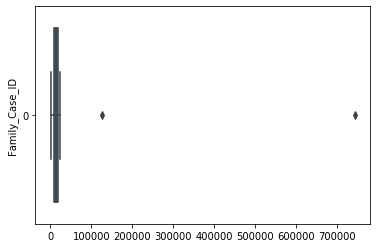

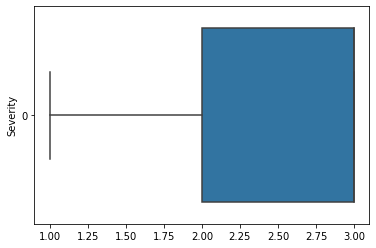

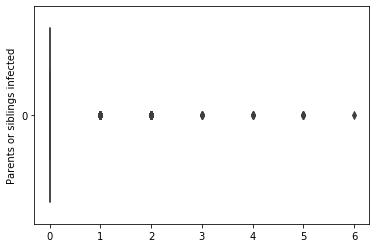

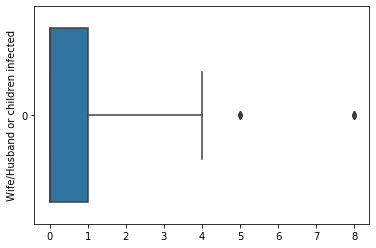

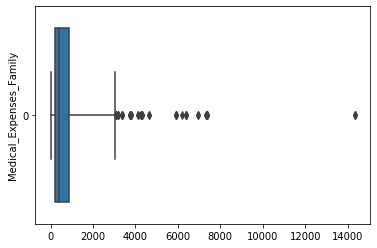

In [50]:
col = ['Family_Case_ID', 'Severity', 'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family']

for col in col:

    sns.boxplot(data = df[col], orient = "h", whis = 3.5)
    plt.ylabel(col)
    plt.show()

We have outliers in: Family_Case_ID, Parents or siblings infected, Wife/Husband or children infected and Medical_Expenses_Family

In [51]:
def zscore(series):
    """Returns the Z score"""
    return (series-series.mean()) / series.std()

In [52]:
df_new.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'Medical_Tent', 'City', 'Deceased'],
      dtype='object')

In [53]:
out_1 = zscore(df_new['Family_Case_ID'])
out_2 = zscore(df_new['Parents or siblings infected'])
out_3 = zscore(df_new['Wife/Husband or children infected'])
out_4 = zscore(df_new['Medical_Expenses_Family'])

In [54]:
df_out = pd.DataFrame({'Family_Case_ID': out_1, 'Parents or siblings infected': out_2,
                       'Wife/Husband or children infected': out_3, 'Medical_Expenses_Family': out_4
                      })

In [55]:
df_out.shape #Correct

(900, 4)

With a threshold of 3 we got 67 outliers that's about 7% of the data, too much.

With a threshold of 4 we got 35 outliers that's about 4% of the data, this is fine.

In [56]:
df_out_1 = df_out[(df_out['Family_Case_ID'] > 4) | (df_out['Family_Case_ID'] < -4)]
#df_out_1.shape
#2 outliers with threshold = 3
#2 outliers with threshold = 4
list_1 = list(df_out_1.index)

In [57]:
df_out_2 = df_out[(df_out['Parents or siblings infected'] > 4) | (df_out['Parents or siblings infected'] < -4)]
#df_out_2.shape
#15 outliers with threshold = 3
#10 outliers with threshold = 4
list_2 = list(df_out_2.index)

In [58]:
df_out_3 = df_out[(df_out['Wife/Husband or children infected'] > 4) | (df_out['Wife/Husband or children infected'] < -4)]
#df_out_3.shape
#30 outliers with threshold = 3
#12 outliers with threshold = 4
list_3 = list(df_out_3.index)

In [59]:
df_out_4 = df_out[(df_out['Medical_Expenses_Family'] > 4) | (df_out['Medical_Expenses_Family'] < -4)]
#df_out_4.shape
#20 outliers with threshold = 3
#11 outliers with threshold = 4
list_4 = list(df_out_4.index)

In [60]:
#all outliers together
list_all = list_1 + list_2 + list_3 + list_4

list_to_remove = []

for i in list_all:
  if i not in list_to_remove:
    list_to_remove.append(i)

In [61]:
for i in list_to_remove:
    df_new = df_new.drop([df_new.index[i]])

In [62]:
df_new.shape

(866, 9)